# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Comprehension

In [47]:
df = pd.read_csv('tayara_real_estate_raw.csv')
df.head()

,price,title,category,city,time,description,superficie,transType,bains,chambres
0,1340.0,Appartement S+3 à louer à cité nkhilette,Appartements,Ariana,a few seconds ago,JUST ON TIME IMMO met à votre disposition pour...,136.0,À Louer,0,3
1,430000.0,À vendre S+3 haut standing à nasr 2,Appartements,Ariana,a minute ago,JUST ON TIME IMMO met à votre disposition un a...,132.0,À Vendre,0,3
2,1100.0,Bureau H+2 à louer à cité el ghazela,Appartements,Ariana,a minute ago,JUST ON TIME IMMO met à votre disposition pour...,120.0,À Louer,0,2
3,1300.0,À louer appartement S+3 jamais habité à cité e...,Appartements,Ariana,2 minutes ago,JUST ON TIME IMMO met à votre disposition pour...,140.0,À Louer,0,3
4,1300.0,Appartement s+3 à louer à riadh landalous,Appartements,Ariana,2 minutes ago,JUST ON TIME IMMO met à votre disposition un a...,160.0,À Louer,0,3


In [43]:
df.shape

(6990, 10)

## Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990 entries, 0 to 6989
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        6145 non-null   float64
 1   title        6990 non-null   object 
 2   category     6990 non-null   object 
 3   city         6990 non-null   object 
 4   time         6990 non-null   object 
 5   description  6978 non-null   object 
 6   superficie   5490 non-null   float64
 7   transType    5757 non-null   object 
 8   bains        5566 non-null   object 
 9   chambres     5513 non-null   object 
dtypes: float64(2), object(8)
memory usage: 546.2+ KB


In [5]:
df.describe()

,price,superficie
count,6.145000e+03,5.490000e+03
mean,8.600145e+06,6.930670e+04
std,2.269073e+08,3.749545e+06
min,1.200000e+00,-1.020000e+02
25%,1.000000e+03,7.500000e+01
50%,2.800000e+03,1.100000e+02
75%,2.400000e+05,1.800000e+02
max,1.111111e+10,2.597673e+08


In [48]:
df['category'].value_counts()

category
Appartements                                 3099
Maisons et Villas                            1299
Terrains et Fermes                           1082
Bureaux et Plateaux                           770
Magasins, Commerces et Locaux industriels     426
Locations de vacances                         186
Autres Immobiliers                             96
Colocations                                    32
Name: count, dtype: int64

In [49]:
df_dar = df[(df['category'] == 'Maisons et Villas') | (df['category'] == 'Appartements')]
df_dar.shape

(4398, 10)

In [50]:
df_dar['transType'].value_counts()

transType
À Louer     2256
À Vendre    2093
rent           2
sale           1
Name: count, dtype: int64

In [52]:
df_vente = df_dar[(df_dar['transType'] == 'À Vendre') | (df_dar['transType'] == 'sale')]
df_vente.shape

(2094, 10)

In [53]:
df_duplicate = df_vente.drop_duplicates()
df_duplicate.shape

(1787, 10)

In [11]:
df_sample = df_duplicate.sample(frac=0.1, random_state=42)
df_sample.shape

(590, 10)

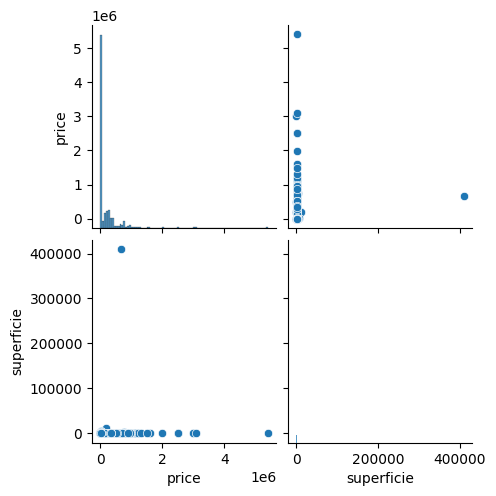

In [13]:
# Pour un aperçu global des relations
df_numeric = df_sample[['price', 'superficie']].apply(pd.to_numeric, errors='coerce')
sns.pairplot(df_numeric.dropna(), diag_kind='hist')
plt.show()

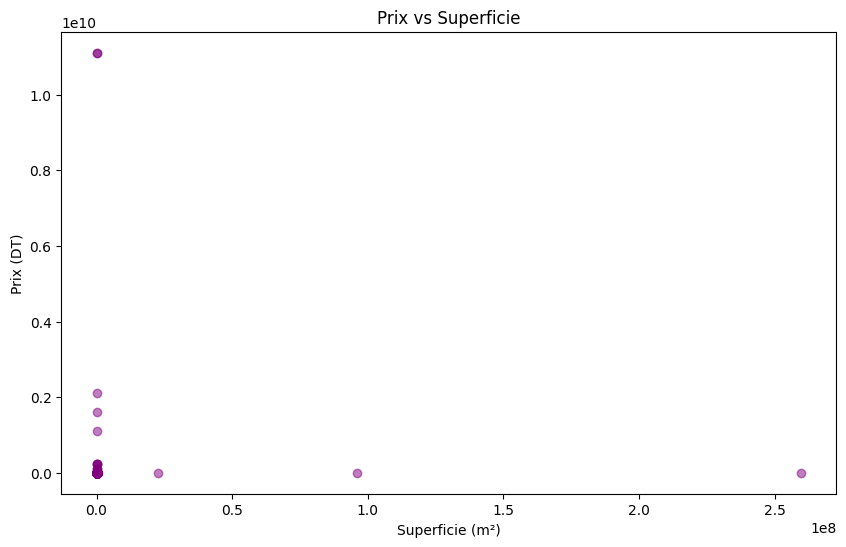

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df['superficie'], df['price'], alpha=0.5, c='purple')
plt.xlabel('Superficie (m²)')
plt.ylabel('Prix (DT)')
plt.title('Prix vs Superficie')
plt.show()

In [16]:
df.columns

Index(['price', 'title', 'category', 'city', 'time', 'description',
       'superficie', 'transType', 'bains', 'chambres'],
      dtype='object')

In [72]:
df_num = df_duplicate.copy()

In [73]:
df_num["superficie"] = pd.to_numeric(df_num["superficie"], errors='coerce').astype('Float64')
df_num["price"] = pd.to_numeric(df_num["price"], errors='coerce').astype('Float64')
df_num["bains"] = pd.to_numeric(df_num["bains"], errors='coerce').astype('Int64')
df_num["chambres"] = pd.to_numeric(df_num["chambres"], errors='coerce').astype('Int64')

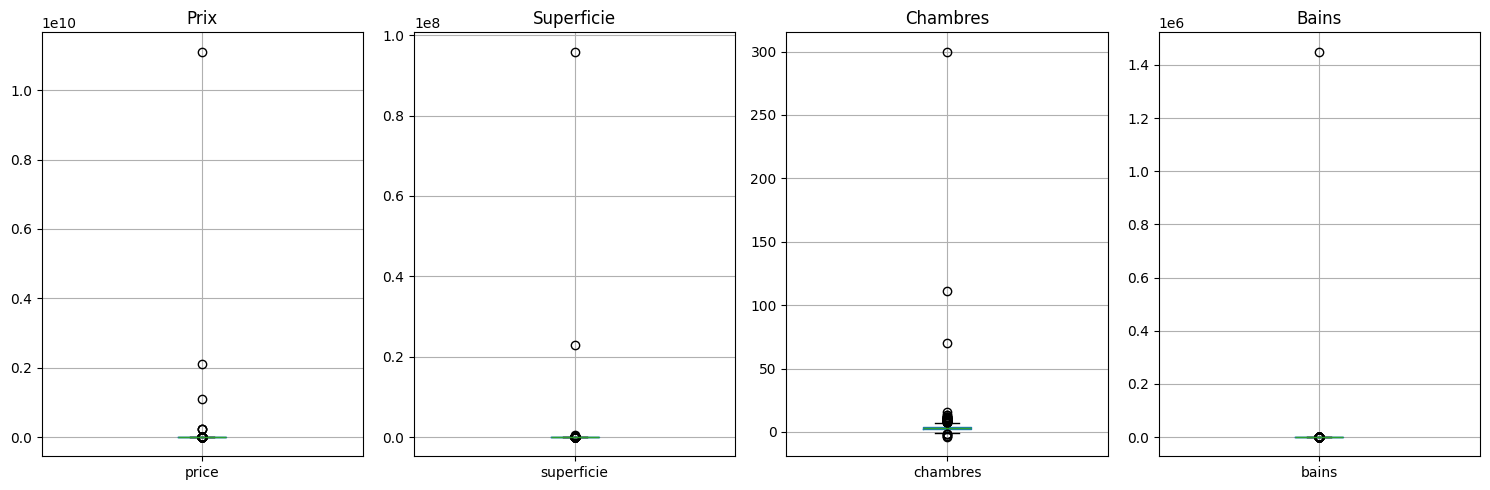

In [74]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

df_num.boxplot(column='price', ax=axes[0])
axes[0].set_title('Prix')

df_num.boxplot(column='superficie', ax=axes[1])
axes[1].set_title('Superficie')

df_num.boxplot(column='chambres', ax=axes[2])
axes[2].set_title('Chambres')

df_num.boxplot(column='bains', ax=axes[3])
axes[3].set_title('Bains')

plt.tight_layout()
plt.show()

In [77]:
df_num.describe()

,price,superficie,bains,chambres
count,1561.0,1710.0,1723.0,1725.0
mean,10002935.937668,69931.812374,843.944283,3.215072
std,287649256.782695,2383534.41073,34932.09818,8.008522
min,1.2,-102.0,-2.0,-4.0
25%,180000.0,94.0,1.0,2.0
50%,290000.0,128.0,1.0,3.0
75%,460000.0,260.0,2.0,4.0
max,11111111000.0,95905179.0,1450000.0,300.0


In [78]:
df_num[df_num['price']> 1_000_000]

,price,title,category,city,time,description,superficie,transType,bains,chambres
247,1399999.0,Villa s+4 situer a cité Moez La Marsa,Maisons et Villas,Tunis,3 hours ago,Cette spacieuse villa S+5 de 340 m² est située...,340.0,À Vendre,2,4
283,1350000.0,🏠 Villa jumelée jamais habité S+4 avec jardin ...,Maisons et Villas,Ariana,3 hours ago,📍Emplacement : La Soukra.\n📐Superficie terrain...,300.0,À Vendre,3,4
357,1050000.0,"Villa "" Manhattan """,Maisons et Villas,Nabeul,4 hours ago,À vendre chez Green Immobilier une demeure bie...,420.0,À Vendre,4,4
359,1150000.0,Villa BLONDIE,Maisons et Villas,Nabeul,4 hours ago,À vendre chez Green Immobilier une demeure bie...,650.0,À Vendre,4,4
446,1200000.0,km 2.5 route mohamed gayed (emplacement commer...,Maisons et Villas,Sfax,5 hours ago,𝗞𝗺 𝟮.𝟱 𝗿𝗼𝘂𝘁𝗲 𝗺𝗼𝗵𝗮𝗺𝗲𝗱 𝗸𝗮𝗶𝗲𝗱(𝗲𝗺𝗽𝗹𝗮𝗰𝗲𝗺𝗲𝗻𝘁 𝗰𝗼𝗺𝗺𝗲𝗿...,970.0,À Vendre,4,8
...,...,...,...,...,...,...,...,...,...,...
6708,1300000.0,À VENDRE VILLA EXCEPTIONNELLE SUR LES HAUTEURS...,Maisons et Villas,Ben Arous,16 days ago,🔹MAXULA IMMOBILIERE vous propose à la VENTE un...,580.0,À Vendre,2,7
6709,1300000.0,À VENDRE VILLA S+5 DANS LA QUIÈTUDE DE RADES M...,Maisons et Villas,Ben Arous,16 days ago,🔹MAXULA IMMOBILIERE vous propose à la VENTE un...,1053.0,À Vendre,2,5
6759,1380000.0,Villa plain pied a vendre à El Menzah 5,Maisons et Villas,tunis,17 days ago,une villa de plain-pied idéalement située au c...,530.0,À Vendre,4,3
6955,2099999.0,A vendre une villa avec deux appartement S+2,Maisons et Villas,Nabeul,18 days ago,"À vendre à Aïn Grenz – Kélibia, une villa de p...",936.0,À Vendre,2,4


In [79]:
df_num.isna().sum()

price          226
title            0
category         0
city             0
time             0
description      2
superficie      77
transType        0
bains           64
chambres        62
dtype: int64

# Data Preparation
## Price cleaning

In [ ]:
df_num

In [140]:
import re
# Fonction pour extraire le prix depuis un texte
def extract_price(text):
    """
    Extrait le prix depuis un texte (titre ou description).
    Convertit toutes les unités en dinars tunisiens (DT).
    
    Unités supportées:
    - million/m/md = 1,000,000 DT
    - mille/k = 1,000 DT
    - dt/dinar/d = 1 DT
    """
    if not isinstance(text, str):
        return None
    
    text = text.lower().replace(" ", "").replace(",", ".")
    
    # Pattern pour millions (1,000,000 DT)
    # Formats: 1.5m, 1.5md, 1.5million, 1.5milliondinar, 1.5مليون
    million_pattern = r"(\d+\.?\d*)\s*(millions?|milliondinar|milliondinars|md|m(?!ille)|مليون)"
    
    # Pattern pour milliers (1,000 DT)  
    # Formats: 150k, 150mille, 150milleDT, 150ألف
    mille_pattern = r"(\d+\.?\d*)\s*(milles?|milledinars?|milledt|k|ألف|ألفدينار)"
    
    # Pattern pour dinars directs
    # Formats: 150000dt, 150000dinar, 150000د
    dinar_pattern = r"(\d+\.?\d*)\s*(d|dt|dinars?|dinartunisien|د|دينار)"
    
    # Pattern pour grands nombres sans unité (>= 10000, probablement en DT)
    big_number_pattern = r"(\d{5,})"
    
    # 1. Chercher les millions
    match = re.search(million_pattern, text, re.IGNORECASE)
    if match:
        number = float(match.group(1))
        return number * 1_000_000
    
    # 2. Chercher les milliers
    match = re.search(mille_pattern, text, re.IGNORECASE)
    if match:
        number = float(match.group(1))
        return number * 1_000
    
    # 3. Chercher les dinars directs
    match = re.search(dinar_pattern, text, re.IGNORECASE)
    if match:
        number = float(match.group(1))
        # Si le nombre est petit (<100), c'est probablement en milliers
        if number < 100:
            return number * 1_000
        return number
    
    # 4. Chercher un grand nombre sans unité
    match = re.search(big_number_pattern, text)
    if match:
        number = float(match.group(1))
        # Filtrer les valeurs aberrantes (trop grandes = probablement erreur)
        if 10_000 <= number <= 50_000_000:
            return number
    
    return None

# Fonction pour extraire le prix depuis une ligne du DataFrame
def extract_price_from_row(row):
    """
    Extrait le prix depuis title et description d'une ligne.
    Priorité: price existant > titre > description
    """
    # Si price existe déjà et est valide
    if pd.notna(row.get('price')) and row['price'] > 0:
        price = row['price']
        # Vérifier si c'est une valeur raisonnable
        if 60_000 <= price <= 4_000_000:
            return price
    
    # Combiner titre et description
    title = str(row.get('title', '')) if pd.notna(row.get('title')) else ''
    description = str(row.get('description', '')) if pd.notna(row.get('description')) else ''
    
    # Essayer d'abord le titre
    price = extract_price(title)
    if price and 60_000 <= price <= 4_000_000:
        return price
    
    # Ensuite la description
    price = extract_price(description)
    if price and 60_000 <= price <= 4_000_000:
        return price
    
    return None

In [81]:
# Tests
test_cases = [
    "Appartement 1.5 million",
    "Villa à 250 mille dinars",
    "Maison 150k",
    "Prix: 450000 DT",
    "Appartement 2md",
    "Villa à 1.2m",
    "350000",
    "Maison à 85 dt",  # 85k probablement
    "Prix 2 millions dinars",
]

for text in test_cases:
    price = extract_price(text)
    print(f"{text:30} → {price:,.0f} DT" if price else f"{text:30} → None")

Appartement 1.5 million        → 1,500,000 DT
Villa à 250 mille dinars       → 250,000 DT
Maison 150k                    → 150,000 DT
Prix: 450000 DT                → 450,000 DT
Appartement 2md                → 2,000,000 DT
Villa à 1.2m                   → 1,200,000 DT
350000                         → 350,000 DT
Maison à 85 dt                 → 85,000 DT
Prix 2 millions dinars         → 2,000,000 DT


In [82]:
# Filter rows containing "milliard" or "مليار" in title or description
df_milliard = df_num[
    df_num['title'].str.contains('milliard|مليار', case=False, na=False, regex=True) |
    df_num['description'].str.contains('milliard|مليار', case=False, na=False, regex=True)
]

print(f"Nombre de lignes contenant 'milliard' ou 'مليار': {len(df_milliard)}")
df_milliard[['title', 'description', 'price']]

Nombre de lignes contenant 'milliard' ou 'مليار': 2


,title,description,price
235,A vendre Villa spacieuse et lumineuse dans un ...,Villa située à Elmenzah 9A sur un angle de rue...,1.5
5384,عمارة ذات ثلاث طوابق كل طابق فيه 2 شقق في حي ا...,عمارة ذات ثلاث طوابق كل طابق فيه 2 شقق وكل شقة...,1100000000.0


In [84]:
descriptions = df_milliard['description'].tolist()
descriptions

['Villa située à Elmenzah 9A sur un angle de rue , offrant une belle luminosité et visibilité. La Villa est composée de 3 appartements. Le quartier est calme et proche des écoles et transports en communs. Elle est pourvue de 3 garages.\nChaque appartement est constitué de 2 chambres à coucher, cuisine équipée, salle d´eau et WC séparé , salon et salle à manger..ainsi que le Chauffage central. \nPrix de vente : 1milliard 500 dinars.',
 'عمارة ذات ثلاث طوابق كل طابق فيه 2 شقق وكل شقة تتكون من صالة / غرفتان / مطبخ وحمام. \nوطابق تحت ارضي يتكون من صالة / 4غرف / مطبخ وحمام. مدخل لسيارتين وقاراج. \n\nالمساحة = 330متر\nالثمن = مليار و مئة مليون \n\nللمزيد من المعلومات الرجاء التواصل عبر الأرقام التالية \n Afficher le numéro / Afficher le numéro / Afficher le numéro / Afficher le numéro']

In [141]:
df_pricena = df_num[df_num['price'].isna()]
df_pricena.shape

(226, 10)

In [142]:
df_pricena.loc[:, 'price'] = df_pricena.apply(extract_price_from_row, axis=1)
df_pricena.shape

(226, 10)

In [143]:
df_pricena['price'].isna().sum()

np.int64(213)

In [113]:
df_extract_price = df_num.copy()

In [114]:
df_extract_price['price'] = df_extract_price['price'].fillna(df_pricena['price'])

In [115]:
df_extract_price.shape

(1787, 10)

In [116]:
df_extract_price.isna().sum()

price          213
title            0
category         0
city             0
time             0
description      2
superficie      77
transType        0
bains           64
chambres        62
dtype: int64

In [144]:
df_extract_price = df_extract_price.dropna(subset=['price'])
df_extract_price.shape

(1574, 11)

In [120]:
df_extract_price.isna().sum()

price           0
title           0
category        0
city            0
time            0
description     2
superficie     57
transType       0
bains          51
chambres       46
dtype: int64

In [125]:
df_extract_price[df_extract_price['bains'] == 0].shape

(89, 10)

In [ ]:
def normalize_price(price):
    """
    Normalise le prix vers une échelle cohérente en dinars tunisiens (60,000 - 5,000,000 DT).
    
    Logique:
    - Prix < 100: probablement en millions → × 1,000,000
    - Prix 100-999: probablement en milliers → × 1,000
    - Prix 1000-59999: probablement en milliers → × 1,000
    - Prix 60,000-5,000,000: déjà cohérent
    - Prix 5,000,001-50,000,000: probablement en millimes → ÷ 1,000
    - Prix > 50,000,000: probablement en millimes → ÷ 1,000
    """
    if pd.isna(price) or price <= 0:
        return None
    
    MIN_PRICE = 60_000
    MAX_PRICE = 5_000_000
    
    # Déjà dans la plage valide
    if MIN_PRICE <= price <= MAX_PRICE:
        return price
    
    # Prix très bas (probablement en millions: 1.5 = 1.5 million)
    if 0<price < 10:
        adjusted = price * 1_000_000
        if MIN_PRICE <= adjusted <= MAX_PRICE:
            return adjusted
    
    if 10 <= price < 100:
        adjusted = price * 10_000
        if MIN_PRICE <= adjusted <= MAX_PRICE:
            return adjusted
    
    # Prix bas (probablement en milliers: 150 = 150,000 DT)
    if 10 <= price < 1_000:
        adjusted = price * 1_000
        if MIN_PRICE <= adjusted <= MAX_PRICE:
            return adjusted
    
    # Prix moyennement bas (60-59999, probablement en milliers)
    if price < MIN_PRICE:
        adjusted = price * 1_000
        if MIN_PRICE <= adjusted <= MAX_PRICE:
            return adjusted
        # Si toujours trop bas après multiplication, invalide
        return None
    
    # Prix trop élevé (probablement en millimes: 150,000,000 = 150,000 DT)
    if price > MAX_PRICE:
        adjusted = price / 1_000
        if MIN_PRICE <= adjusted <= MAX_PRICE:
            return adjusted
        # Essayer de diviser par 10 (erreur de saisie)
        adjusted = price / 10
        if MIN_PRICE <= adjusted <= MAX_PRICE:
            return adjusted
        # Si toujours hors plage, invalide
        return None
    
    return price

In [127]:
# Appliquer la normalisation
df_extract_price['price_normalized'] = df_extract_price['price'].apply(normalize_price)

# Vérifier les résultats
print("Avant normalisation:")
print(df_extract_price['price'].describe())
print(f"\nNaN: {df_extract_price['price'].isna().sum()}")

print("\nAprès normalisation:")
print(df_extract_price['price_normalized'].describe())
print(f"\nNaN: {df_extract_price['price_normalized'].isna().sum()}")

# Voir les transformations effectuées
df_changes = df_extract_price[df_extract_price['price'] != df_extract_price['price_normalized']][['title', 'price', 'price_normalized']].head(20)
print("\nExemples de transformations:")
df_changes

Avant normalisation:
count              1574.0
mean       9938731.257116
std      286459035.188615
min                   1.2
25%              180000.0
50%              290000.0
75%              470000.0
max         11111111000.0
Name: price, dtype: Float64

NaN: 0

Après normalisation:
count    1.562000e+03
mean     4.748614e+05
std      4.934621e+05
min      6.500000e+04
25%      2.200000e+05
50%      3.200000e+05
75%      5.300000e+05
max      5.000000e+06
Name: price_normalized, dtype: float64

NaN: 12

Exemples de transformations:


,title,price,price_normalized
83,À vendre S+1 / S+2 / S+3sur plan – Remise des ...,2.0,2000000.0
93,A louer appartement s2 haut standing avec plac...,1200.0,1200000.0
131,🏡 À Vendre – Appartements S+1 & S+2 Haut Stand...,3500.0,3500000.0
132,A louer : Etage de villa S+3 à Rades Meliene.,250.0,250000.0
141,A louer appartement s1 haut standing richement...,1100.0,1100000.0
176,A vendre duplex s+4,300.0,300000.0
235,A vendre Villa spacieuse et lumineuse dans un ...,1.5,1500000.0
319,شقة للكراء رمال منزل جميل,698.0,698000.0
432,صفاقس منزل طابق أرضي للبيع,140.0,140000.0
435,A vendre un appartement s+3 à Ennasr.,395.0,395000.0


In [131]:
df_extract_price[df_extract_price['price_normalized'].isna()]

,price,title,category,city,time,description,superficie,transType,bains,chambres,price_normalized
313,6.0,villa a vendre,Maisons et Villas,Nabeul,4 hours ago,🏡 𝐀̀ 𝐕𝐞𝐧𝐝𝐫𝐞 : 𝐕𝐢𝐥𝐥𝐚 𝐒+𝟒 𝐬𝐮𝐫 𝐚̀ 𝐇𝐚𝐦𝐦𝐚𝐦𝐞𝐭 𝐍𝐨𝐫𝐝\...,300.0,À Vendre,2,4,NaN
2140,12345.0,villa centre ville saint germai,Maisons et Villas,Ben Arous,3 days ago,une opportunité unique d’investissement immobi...,620.0,À Vendre,2,3,NaN
3250,10.0,maison à vendre,Maisons et Villas,Ben Arous,6 days ago,a vendre une maison de 105m2 situé dans un qua...,105.0,À Vendre,1,3,NaN
3379,35000.0,دار بكسرى العليا,Maisons et Villas,Siliana,6 days ago,منزل بكسرى العليا حي المؤذنين مساحته 70م² مجه...,70.0,À Vendre,2,4,NaN
3408,11111111000.0,عقار تجاري سكني للبيع la marsa \nوراء المركز ...,Appartements,Tunis,7 days ago,عقار يحتوي (3طوابق )\nطابقين بثلاث محلات تجار...,180.0,À Vendre,3,6,NaN
3432,55.0,Fonds de commerce à vendre tous commerce,Maisons et Villas,Tunis,7 days ago,Fonds de Commerce a vendre Tous commerce avec ...,25.0,À Vendre,1,0,NaN
3715,50000.0,للبيع دار عربي بمنزل تميم ( حومة الحويوي ) مسا...,Maisons et Villas,Nabeul,7 days ago,دار عربي بمنزل تميم ( حومة محمد بن فضل) مساحته...,100.0,À Vendre,1,2,NaN
4374,35000.0,دار بكسرى العليا,Maisons et Villas,Siliana,7 days ago,منزل بكسرى العليا حي المؤذنين مساحته 70م² مجه...,70.0,À Vendre,2,4,NaN
4712,50000.0,للبيع دار عربي بمنزل تميم ( حومة الحويوي ) مسا...,Maisons et Villas,Nabeul,8 days ago,دار عربي بمنزل تميم ( حومة محمد بن فضل) مساحته...,100.0,À Vendre,1,2,NaN
5529,50000.0,A vendre Maison située à plein centre-ville Da...,Maisons et Villas,tunis,11 days ago,L’agence immobilière le boulevard vous propose...,47.0,À Vendre,1,1,NaN


In [139]:
df_extract_price['description'][313]

'🏡 𝐀̀ 𝐕𝐞𝐧𝐝𝐫𝐞 : 𝐕𝐢𝐥𝐥𝐚 𝐒+𝟒 𝐬𝐮𝐫  𝐚̀ 𝐇𝐚𝐦𝐦𝐚𝐦𝐞𝐭 𝐍𝐨𝐫𝐝\n📍 À seulement 5 minutes de la mer 🌊\n📍 Proche de l’hôtel Sindbad\n🏊\u200d♂️ Piscine et jardin\n🚗 Parking \n📞 Pour plus d’informations ou pour une visite : 📱 Afficher le numéro/ Afficher le numéro📱'

In [145]:
df_extract_price.loc[:, 'price'] = df_extract_price['price_normalized']

In [146]:
df_extract_price.isna().sum()

price               12
title                0
category             0
city                 0
time                 0
description          2
superficie          57
transType            0
bains               51
chambres            46
price_normalized    12
dtype: int64

In [147]:
df_extract_price.drop(columns=['price_normalized'], inplace=True)

In [148]:
df_extract_price.columns

Index(['price', 'title', 'category', 'city', 'time', 'description',
       'superficie', 'transType', 'bains', 'chambres'],
      dtype='object')

In [149]:
df_extract_price = df_extract_price.dropna(subset=['price'])

### Drop time, category and transType columns (useless)

In [150]:
df_use_cols = df_extract_price[['title', 'description', 'price', 'superficie', 'chambres', 'bains','city']]

In [151]:
df_use_cols.columns

Index(['title', 'description', 'price', 'superficie', 'chambres', 'bains',
       'city'],
      dtype='object')

In [152]:
df_use_cols.isna().sum()

title           0
description     2
price           0
superficie     57
chambres       46
bains          51
city            0
dtype: int64

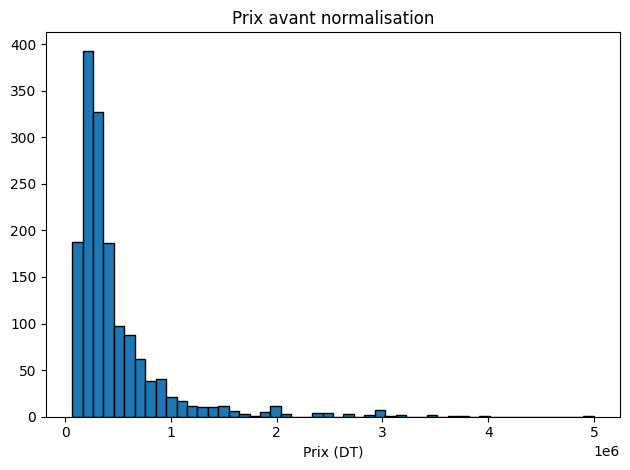

In [154]:

# Après
plt.hist(df_extract_price['price'], bins=50, edgecolor='black')
plt.title('Prix après normalisation')
plt.xlabel('Prix (DT)')


plt.tight_layout()
plt.show()

## Superficie cleaning

In [167]:
def extract_superficie(text):
    """
    Extrait la superficie depuis un texte (titre ou description).
    Retourne la valeur en m².
    
    Formats supportés:
    - 120m², 120 m2, 120m2, 120 m²
    - 120 mètres carrés, 120 metres carres
    - 120 متر, 120 م²
    - superficie 120, surface 120
    """
    if not isinstance(text, str):
        return None
    
    text = text.lower()
    
    # Pattern principal: nombre suivi de m², m2, mètres carrés, etc.
    patterns = [
        r"(\d+\.?\d*)\s*m",                              # 120m , 120 m
        r"(\d+\.?\d*)\s*m[²2]",                          # 120m², 120m2, 120 m²
        #r"(\d+\.?\d*)\s*m[eè]tres?",                     # 120metre(s), 120 metre(s), 120 mètre(s), 120mètre(s)
        r"(\d+\.?\d*)\s*m[eè]tres?\s*carr[ée]s?",        # 120 mètres carrés
        r"(\d+\.?\d*)\s*متر",                            # 120 متر (arabe)
        r"(\d+\.?\d*)\s*م[²2]?",                         # 120 م² (arabe)
        r"superficie\s*:?\s*(\d+\.?\d*)",                # superficie: 120
        r"surface\s*:?\s*(\d+\.?\d*)",                   # surface: 120
        r"(\d+\.?\d*)\s*sqm",                            # 120 sqm
    ]
    
    for pattern in patterns:
        match = re.search(pattern, text, re.IGNORECASE)
        if match:
            superficie = float(match.group(1))
            # Filtrer les valeurs aberrantes (trop petites ou trop grandes)
            if 20 <= superficie <= 2000:
                return superficie
    
    return None


def extract_superficie_from_row(row):
    """
    Extrait la superficie depuis title et description d'une ligne.
    Priorité: superficie existante > titre > description
    """
    # Si superficie existe déjà et est valide
    if pd.notna(row.get('superficie')) and row['superficie'] > 0:
        superficie = row['superficie']
        if 30 <= superficie <= 700:
            return superficie
    
    # Essayer le titre
    title = str(row.get('title', '')) if pd.notna(row.get('title')) else ''
    superficie = extract_superficie(title)
    if superficie:
        return superficie
    
    # Essayer la description
    description = str(row.get('description', '')) if pd.notna(row.get('description')) else ''
    superficie = extract_superficie(description)
    if superficie:
        return superficie
    
    return None


# Tests
test_cases = [
    "Appartement 120m² à vendre",
    "Villa 250 m2 avec jardin",
    "Maison superficie 180",
    "Surface: 95 mètres carrés",
    "شقة 150 متر",
    "Duplex 200m² + terrasse 50m²",
    "Appartement S+2 de 85 m²",
    "150 sqm apartment",
    "Studio 25m",
    "Appartement sans superficie indiquée",
    "Maison de 300 metre"
]

print("Tests extraction superficie:")
for text in test_cases:
    sup = extract_superficie(text)
    print(f"{text:40} → {sup} m²" if sup else f"{text:40} → None")

Tests extraction superficie:
Appartement 120m² à vendre               → 120.0 m²
Villa 250 m2 avec jardin                 → 250.0 m²
Maison superficie 180                    → 180.0 m²
Surface: 95 mètres carrés                → 95.0 m²
شقة 150 متر                              → 150.0 m²
Duplex 200m² + terrasse 50m²             → 200.0 m²
Appartement S+2 de 85 m²                 → 85.0 m²
150 sqm apartment                        → 150.0 m²
Studio 25m                               → 25.0 m²
Appartement sans superficie indiquée     → None
Maison de 300 metre                      → 300.0 m²


In [168]:
# Appliquer l'extraction aux lignes avec superficie NaN =57
df_supna = df_use_cols[df_use_cols['superficie'].isna()].copy()
df_supna['superficie'] = df_supna.apply(extract_superficie_from_row, axis=1)
df_supna['superficie'].isna().sum()

np.int64(27)

In [172]:
superficies_na = df_supna[df_supna['superficie'].isna()]['description'].tolist()

In [ ]:
for sup in superficies_na:
    print(sup)

In [175]:
# Remplir les NaN dans le DataFrame principal
df_use_cols.loc[:, 'superficie'] = df_use_cols['superficie'].fillna(df_supna['superficie'])
df_use_cols['superficie'].isna().sum()

np.int64(27)

In [176]:
df_use_cols.dropna(subset=['superficie'], inplace=True)
df_use_cols['superficie'].isna().sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_25128\2654504330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_use_cols.dropna(subset=['superficie'], inplace=True)


np.int64(0)

In [177]:
df_use_cols.isna().sum()

title           0
description     1
price           0
superficie      0
chambres       39
bains          44
city            0
dtype: int64

In [178]:
df_use_cols['superficie'].describe()

count            1535.0
mean       77812.666554
std      2515699.764517
min              -102.0
25%               92.35
50%               124.0
75%               241.0
max          95905179.0
Name: superficie, dtype: Float64

In [181]:
def normalize_superficie(superficie):
    """
    Normalise la superficie vers une échelle cohérente (30 - 700 m²).
    
    Logique:
    - Convertir les valeurs négatives en positives (valeur absolue)
    - Superficie < 30: probablement erreur ou valeur en ares → × 100
    - Superficie 30-700: déjà cohérent
    - Superficie > 700: probablement en cm² ou erreur → ÷ 100 ou ÷ 10000
    """
    if pd.isna(superficie):
        return None
    
    # Convertir en valeur absolue (valeurs négatives → positives)
    superficie = abs(superficie)
    
    if superficie <= 0:
        return None
    
    MIN_SUP = 30
    MAX_SUP = 700
    
    # Déjà dans la plage valide
    if MIN_SUP <= superficie <= MAX_SUP:
        return superficie
    
    # Superficie trop petite (< 30)
    if superficie < MIN_SUP:
        # Trop petit, invalide
        return None
    
    # Superficie trop grande (> 700)
    if superficie > MAX_SUP:
        # Hors plage, invalide
        return None
    
    return superficie

In [182]:
# Appliquer la normalisation
df_use_cols['superficie_normalized'] = df_use_cols['superficie'].apply(normalize_superficie)

# Vérifier les résultats
print("Avant normalisation:")
print(df_use_cols['superficie'].describe())
print(f"NaN: {df_use_cols['superficie'].isna().sum()}")
print(f"Valeurs négatives: {(df_use_cols['superficie'] < 0).sum()}")

print("\nAprès normalisation:")
print(df_use_cols['superficie_normalized'].describe())
print(f"NaN: {df_use_cols['superficie_normalized'].isna().sum()}")

# Voir les transformations effectuées
df_sup_changes = df_use_cols[df_use_cols['superficie'] != df_use_cols['superficie_normalized']][['title', 'superficie', 'superficie_normalized']].head(20)
print("\nExemples de transformations:")
df_sup_changes

Avant normalisation:
count            1535.0
mean       77812.666554
std      2515699.764517
min              -102.0
25%               92.35
50%               124.0
75%               241.0
max          95905179.0
Name: superficie, dtype: Float64
NaN: 0
Valeurs négatives: 1

Après normalisation:
count    1457.000000
mean      182.158655
std       141.282715
min        30.000000
25%        93.000000
50%       122.000000
75%       218.000000
max       700.000000
Name: superficie_normalized, dtype: float64
NaN: 78

Exemples de transformations:


C:\Users\DELL\AppData\Local\Temp\ipykernel_25128\1315739916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_use_cols['superficie_normalized'] = df_use_cols['superficie'].apply(normalize_superficie)


,title,superficie,superficie_normalized
5821,للبيع أو الكراء منزل من طابقين بحي الباهي لدغ...,-102.0,102.0


In [ ]:
# Remplacer superficie par la version normalisée
df_use_cols.loc[:, 'superficie'] = df_use_cols['superficie_normalized']
df_use_cols.drop(columns=['superficie_normalized'], inplace=True)


In [185]:
# avant 1535
# Supprimer les lignes avec superficie NaN après normalisation
df_use_cols = df_use_cols.dropna(subset=['superficie'])
print(f"Shape après normalisation: {df_use_cols.shape}")

Shape après normalisation: (1457, 7)


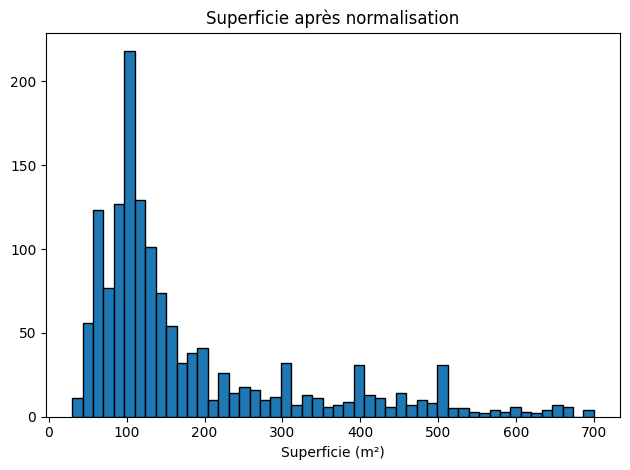

In [186]:
# Après
plt.hist(df_use_cols['superficie'], bins=50, edgecolor='black')
plt.title('Superficie après normalisation')
plt.xlabel('Superficie (m²)')


plt.tight_layout()
plt.show()

In [187]:
df_use_cols.isna().sum()

title           0
description     1
price           0
superficie      0
chambres       35
bains          39
city            0
dtype: int64

In [194]:
df_chamb = df_use_cols.copy()

## Chambres cleaning

In [190]:
def extract_chambres(text):
    """
    Extrait le nombre de chambres depuis un texte (titre ou description).
    Cherche le format S+X, s+X, S +X, etc. et additionne si plusieurs.
    
    Formats supportés:
    - S+2, s+2, S +2, S+ 2
    - S+1+2 (additionne: 1+2=3)
    - S1, S2 (sans le +)
    - غرف, غرفة (arabe pour chambre)
    """
    if not isinstance(text, str):
        return None
    
    text = text.lower()
    total_chambres = 0
    found = False
    
    # Pattern principal: S+X ou S +X ou S+ X (peut avoir plusieurs +X)
    # Exemple: "S+2", "S+1+2", "s +3"
    pattern_s_plus = r"s\s*\+\s*(\d+)"
    matches = re.findall(pattern_s_plus, text, re.IGNORECASE)
    if matches:
        for match in matches:
            total_chambres += int(match)
        found = True
    
    # Pattern alternatif: S1, S2, S3 (sans le +)
    if not found:
        pattern_s_num = r"\bs(\d)\b"
        matches = re.findall(pattern_s_num, text, re.IGNORECASE)
        if matches:
            for match in matches:
                total_chambres += int(match)
            found = True
    
    # Pattern pour "X chambres" ou "X pièces"
    if not found:
        pattern_chambres = r"(\d+)\s*(chambres?|pièces?|pieces?|غرف|غرفة)"
        matches = re.findall(pattern_chambres, text, re.IGNORECASE)
        if matches:
            for match in matches:
                total_chambres += int(match[0])
            found = True
    
    if found and total_chambres > 0:
        return total_chambres
    
    return None


def extract_chambres_from_row(row):
    """
    Extrait le nombre de chambres depuis title et description d'une ligne.
    Priorité: chambres existant valide > titre > description
    """
    # Si chambres existe déjà et est valide (1-10)
    if pd.notna(row.get('chambres')) and 1 <= row['chambres'] <= 10:
        return row['chambres']
    
    # Essayer le titre
    title = str(row.get('title', '')) if pd.notna(row.get('title')) else ''
    chambres = extract_chambres(title)
    if chambres and 1 <= chambres <= 10:
        return chambres
    
    # Essayer la description
    description = str(row.get('description', '')) if pd.notna(row.get('description')) else ''
    chambres = extract_chambres(description)
    if chambres and 1 <= chambres <= 10:
        return chambres
    
    return None

In [192]:
# Tests
test_cases = [
    "Appartement S+2 à vendre",
    "Villa S+3 avec jardin",
    "Maison S+1+2 spacieuse",      # 1+2 = 3 chambres
    "Duplex S +4",
    "Studio S+1",
    "Appartement S2 lumineux",
    "3 chambres vue mer",
    "شقة 4 غرف",
    "Appartement F3",
    "Maison 5 pièces",
    "S+2+1 grand standing",     # 2+1 = 3 chambres
    "Appartement sans info chambres",
    "S+1 kded S+2"
]

print("Tests extraction chambres:")
for text in test_cases:
    ch = extract_chambres(text)
    print(f"{text:35} → {ch} chambre(s)" if ch else f"{text:35} → None")

Tests extraction chambres:
Appartement S+2 à vendre            → 2 chambre(s)
Villa S+3 avec jardin               → 3 chambre(s)
Maison S+1+2 spacieuse              → 1 chambre(s)
Duplex S +4                         → 4 chambre(s)
Studio S+1                          → 1 chambre(s)
Appartement S2 lumineux             → 2 chambre(s)
3 chambres vue mer                  → 3 chambre(s)
شقة 4 غرف                           → 4 chambre(s)
Appartement F3                      → None
Maison 5 pièces                     → 5 chambre(s)
S+2+1 grand standing                → 2 chambre(s)
Appartement sans info chambres      → None
S+1 kded S+2                        → 3 chambre(s)


In [ ]:
df_cham_na = df_use_cols[df_use_cols['chambres'].isna()]

In [ ]:
df_cham_na['chambres'] = df_cham_na.apply(extract_chambres_from_row, axis=1)

print(f"NaN chambres avant extraction: {df_use_cols['chambres'].isna().sum()}")
print(f"NaN chambres après extraction: {df_cham_na['chambres'].isna().sum()}")



NaN chambres avant extraction: 35
NaN chambres après extraction: 15


C:\Users\DELL\AppData\Local\Temp\ipykernel_25128\3696570015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cham_na['chambres'] = df_cham_na.apply(extract_chambres_from_row, axis=1)


In [195]:
# Remplir les NaN dans le DataFrame principal
df_chamb['chambres'] = df_chamb['chambres'].fillna(df_cham_na['chambres'])

print(f"NaN chambres final: {df_chamb['chambres'].isna().sum()}")

NaN chambres final: 15


In [196]:
df_chamb.isna().sum()

title           0
description     1
price           0
superficie      0
chambres       15
bains          39
city            0
dtype: int64

In [199]:
def normalize_chambres(chambres):
    """
    Normalise le nombre de chambres vers une plage cohérente (1 - 10).
    
    Logique:
    - Convertir les valeurs négatives en positives (valeur absolue)
    - Chambres 0: invalide (au moins 1 chambre)
    - Chambres 1-10: déjà cohérent
    - Chambres > 10: probablement erreur, invalide
    """
    if pd.isna(chambres):
        return None
    
    # Convertir en valeur absolue (valeurs négatives → positives)
    chambres = abs(int(chambres))
    
    MIN_CHAMBRES = 0
    MAX_CHAMBRES = 10
    
    
    # Déjà dans la plage valide
    if MIN_CHAMBRES <= chambres <= MAX_CHAMBRES:
        return chambres
    
    # Trop grand (> 10), probablement erreur
    if chambres > MAX_CHAMBRES:
        return None
    
    return chambres


# Appliquer la normalisation
df_chamb['chambres_normalized'] = df_chamb['chambres'].apply(normalize_chambres)

# Vérifier les résultats
print("Avant normalisation:")
print(df_chamb['chambres'].describe())
print(f"NaN: {df_chamb['chambres'].isna().sum()}")

print("\nAprès normalisation:")
print(df_chamb['chambres_normalized'].describe())
print(f"NaN: {df_chamb['chambres_normalized'].isna().sum()}")

# Voir la distribution
print("\nDistribution des chambres:")
print(df_chamb['chambres_normalized'].value_counts().sort_index())

Avant normalisation:
count      1442.0
mean      2.95215
std      3.361588
min          -4.0
25%           2.0
50%           3.0
75%           4.0
max         111.0
Name: chambres, dtype: Float64
NaN: 15

Après normalisation:
count    1434.000000
mean        2.855649
std         1.628668
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        10.000000
Name: chambres_normalized, dtype: float64
NaN: 23

Distribution des chambres:
chambres_normalized
0.0      26
1.0     199
2.0     472
3.0     381
4.0     191
5.0      59
6.0      44
7.0      29
8.0      18
9.0      11
10.0      4
Name: count, dtype: int64


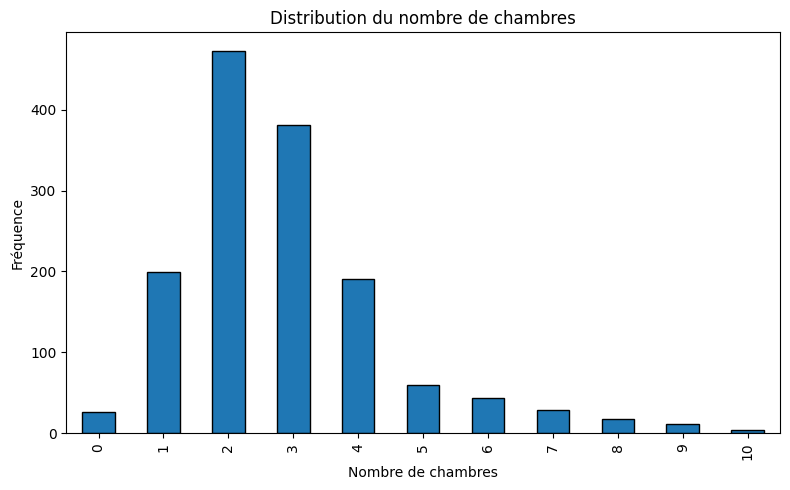

In [200]:
# Remplacer chambres par la version normalisée
df_chamb.loc[:, 'chambres'] = df_chamb['chambres_normalized']
df_chamb.drop(columns=['chambres_normalized'], inplace=True)

# Visualiser
plt.figure(figsize=(8, 5))
df_chamb['chambres'].dropna().astype(int).value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.title('Distribution du nombre de chambres')
plt.xlabel('Nombre de chambres')
plt.ylabel('Fréquence')
plt.tight_layout()
plt.show()

In [202]:
df_chamb.dropna(subset=['chambres'], inplace=True)
df_chamb.isna().sum()

title           0
description     1
price           0
superficie      0
chambres        0
bains          28
city            0
dtype: int64

In [203]:
df_chamb['chambres'].describe()

count      1434.0
mean     2.855649
std      1.628668
min           0.0
25%           2.0
50%           3.0
75%           3.0
max          10.0
Name: chambres, dtype: Float64

In [204]:
df_chamb.shape

(1434, 7)

<Axes: >

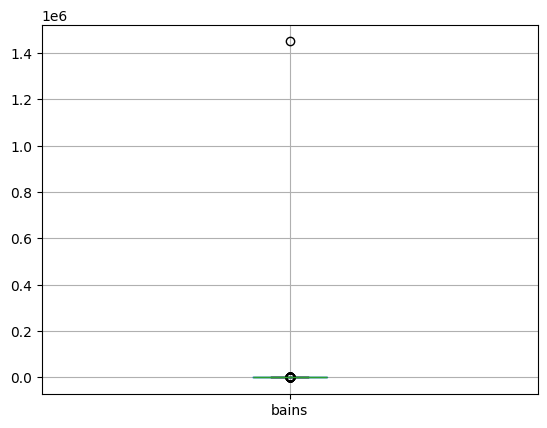

In [207]:
df_chamb.boxplot(column='bains')

## Bains cleaning

In [205]:
def normalize_bains(bains):
    """
    Normalise le nombre de bains vers une plage cohérente (1 - 5).
    
    Logique:
    - Convertir les valeurs négatives en positives (valeur absolue)
    - Bains 0: convertir en 1 (minimum 1 salle de bain)
    - Bains 1-5: déjà cohérent
    - Bains > 5: probablement erreur, invalide
    """
    if pd.isna(bains):
        return None
    
    # Convertir en valeur absolue (valeurs négatives → positives)
    bains = abs(int(bains))
    
    MIN_BAINS = 1
    MAX_BAINS = 5
    
    # Convertir 0 en 1 (au moins 1 salle de bain)
    if bains == 0:
        return 1
    
    # Déjà dans la plage valide
    if MIN_BAINS <= bains <= MAX_BAINS:
        return bains
    
    # Trop grand (> 5), probablement erreur
    if bains > MAX_BAINS:
        return None
    
    return bains


def estimate_bains_from_chambres(chambres):
    """
    Estime le nombre de bains en fonction du nombre de chambres.
    
    Logique proportionnelle:
    - 0-1 chambre: 1 bain
    - 2 chambres: 1 bain
    - 3 chambres: 1 bains
    - 4 chambres: 2 bains
    - 5+ chambres: 3 bains
    """
    if pd.isna(chambres):
        return 1  # Valeur par défaut
    
    chambres = int(chambres)
    
    if chambres <= 3:
        return 1
    elif chambres <= 4:
        return 2
    else:
        return 3


# Copier le DataFrame
df_bains = df_chamb.copy()

# 1. Appliquer la normalisation (0 → 1, valeurs hors plage → None)
df_bains['bains_normalized'] = df_bains['bains'].apply(normalize_bains)

print("Après normalisation:")
print(f"NaN bains: {df_bains['bains_normalized'].isna().sum()}")

# 2. Remplir les NaN avec estimation basée sur les chambres
df_bains['bains_estimated'] = df_bains.apply(
    lambda row: row['bains_normalized'] if pd.notna(row['bains_normalized']) 
                else estimate_bains_from_chambres(row['chambres']),
    axis=1
)

print(f"\nAprès estimation proportionnelle:")
print(f"NaN bains: {df_bains['bains_estimated'].isna().sum()}")

# Vérifier les résultats
print("\nAvant traitement:")
print(df_chamb['bains'].describe())

print("\nAprès traitement:")
print(df_bains['bains_estimated'].describe())

# Voir la distribution
print("\nDistribution des bains:")
print(df_bains['bains_estimated'].value_counts().sort_index())

Après normalisation:
NaN bains: 38

Après estimation proportionnelle:
NaN bains: 0

Avant traitement:
count          1406.0
mean       1033.07468
std      38670.056977
min              -2.0
25%               1.0
50%               1.0
75%               2.0
max         1450000.0
Name: bains, dtype: Float64

Après traitement:
count    1434.000000
mean        1.621339
std         0.878282
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: bains_estimated, dtype: float64

Distribution des bains:
bains_estimated
1.0    824
2.0    414
3.0    129
4.0     49
5.0     18
Name: count, dtype: int64


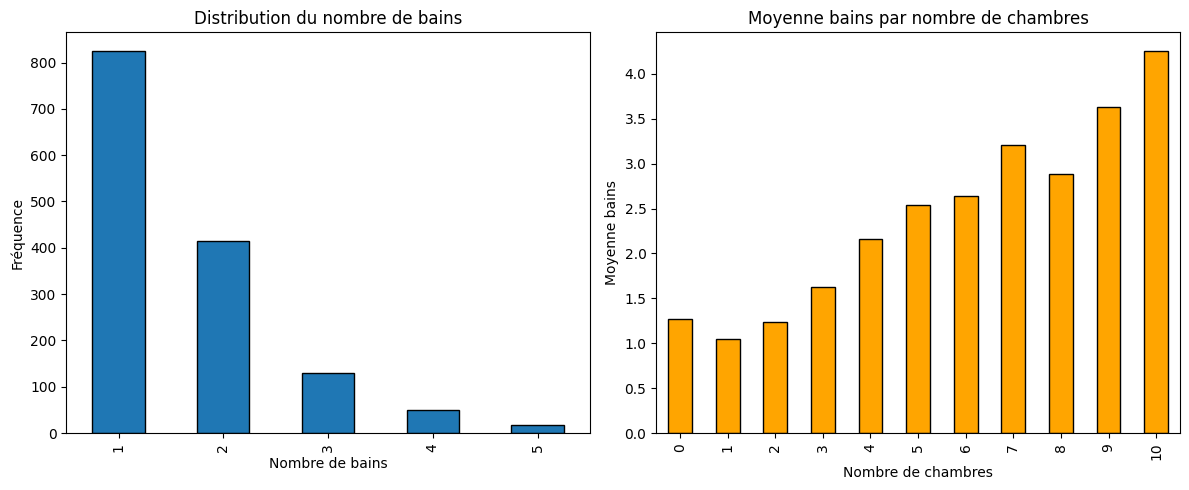


Shape final: (1434, 7)
NaN restants:
title          0
description    1
price          0
superficie     0
chambres       0
bains          0
city           0
dtype: int64


In [208]:
# Remplacer bains par la version finale
df_bains['bains'] = df_bains['bains_estimated']
df_bains.drop(columns=['bains_normalized', 'bains_estimated'], inplace=True)

# Visualiser
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Distribution des bains
df_bains['bains'].astype(int).value_counts().sort_index().plot(kind='bar', ax=axes[0], edgecolor='black')
axes[0].set_title('Distribution du nombre de bains')
axes[0].set_xlabel('Nombre de bains')
axes[0].set_ylabel('Fréquence')

# Relation chambres vs bains
df_bains.groupby('chambres')['bains'].mean().plot(kind='bar', ax=axes[1], edgecolor='black', color='orange')
axes[1].set_title('Moyenne bains par nombre de chambres')
axes[1].set_xlabel('Nombre de chambres')
axes[1].set_ylabel('Moyenne bains')

plt.tight_layout()
plt.show()

print(f"\nShape final: {df_bains.shape}")
print(f"NaN restants:\n{df_bains.isna().sum()}")

## Drop title and description (no more)

In [209]:
df_cleaned = df_bains.drop(columns=['title', 'description'])
df_cleaned.to_csv('tayara_cleaned.csv', index=False)

In [211]:
df_cleaned.isna().sum()

price         0
superficie    0
chambres      0
bains         0
city          0
dtype: int64

# After cleaning visualization

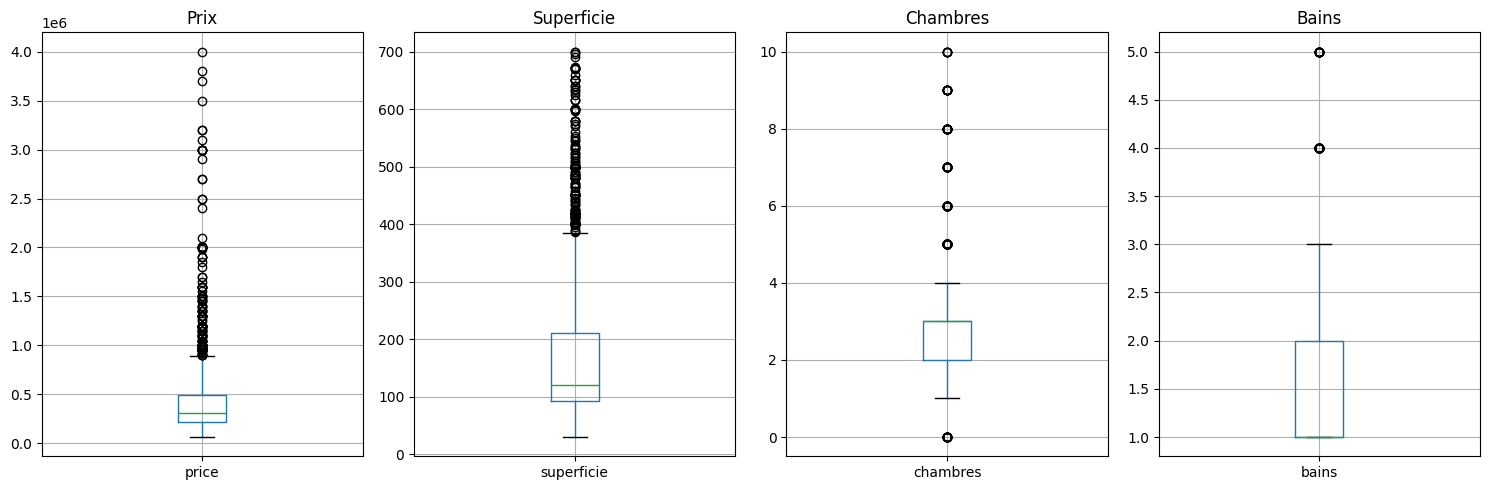

In [212]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

df_cleaned.boxplot(column='price', ax=axes[0])
axes[0].set_title('Prix')

df_cleaned.boxplot(column='superficie', ax=axes[1])
axes[1].set_title('Superficie')

df_cleaned.boxplot(column='chambres', ax=axes[2])
axes[2].set_title('Chambres')

df_cleaned.boxplot(column='bains', ax=axes[3])
axes[3].set_title('Bains')

plt.tight_layout()
plt.show()

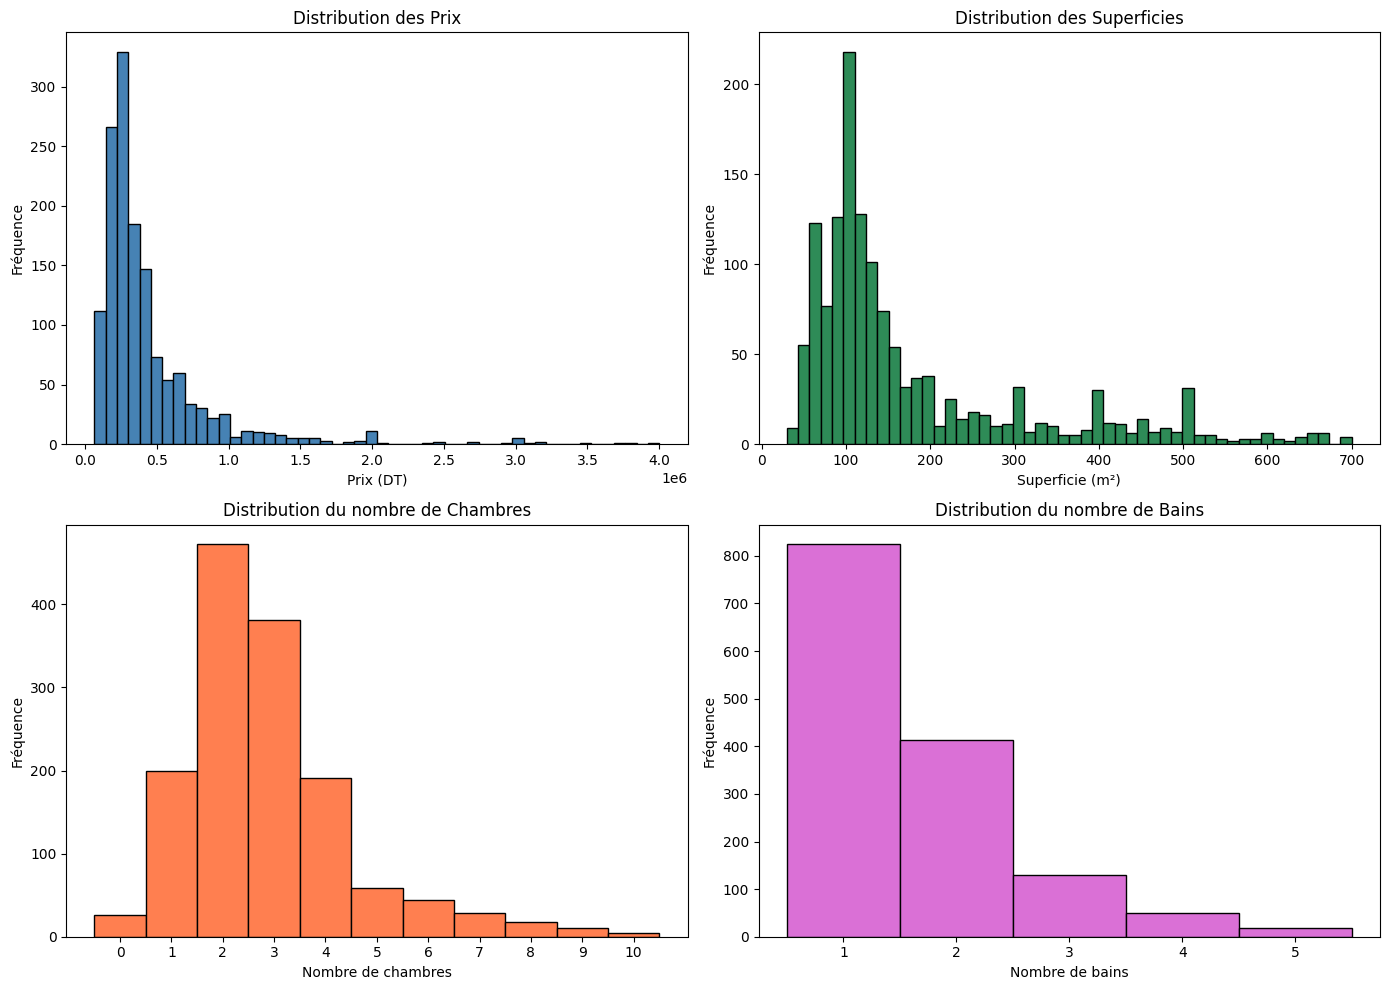

In [213]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Prix
axes[0, 0].hist(df_cleaned['price'], bins=50, edgecolor='black', color='steelblue')
axes[0, 0].set_title('Distribution des Prix')
axes[0, 0].set_xlabel('Prix (DT)')
axes[0, 0].set_ylabel('Fréquence')

# Superficie
axes[0, 1].hist(df_cleaned['superficie'], bins=50, edgecolor='black', color='seagreen')
axes[0, 1].set_title('Distribution des Superficies')
axes[0, 1].set_xlabel('Superficie (m²)')
axes[0, 1].set_ylabel('Fréquence')

# Chambres
axes[1, 0].hist(df_cleaned['chambres'], bins=range(0, 12), edgecolor='black', color='coral', align='left')
axes[1, 0].set_title('Distribution du nombre de Chambres')
axes[1, 0].set_xlabel('Nombre de chambres')
axes[1, 0].set_ylabel('Fréquence')
axes[1, 0].set_xticks(range(0, 11))

# Bains
axes[1, 1].hist(df_cleaned['bains'], bins=range(1, 7), edgecolor='black', color='orchid', align='left')
axes[1, 1].set_title('Distribution du nombre de Bains')
axes[1, 1].set_xlabel('Nombre de bains')
axes[1, 1].set_ylabel('Fréquence')
axes[1, 1].set_xticks(range(1, 6))

plt.tight_layout()
plt.show()

In [215]:
df_cleaned.shape

(1434, 5)

In [216]:
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned.shape

(1377, 5)

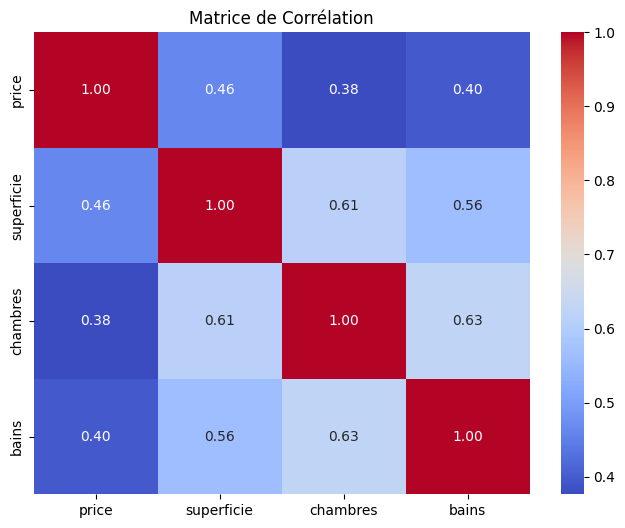

In [218]:
# Matrice de corrélation
plt.figure(figsize=(8, 6))  
corr = df_cleaned[['price', 'superficie', 'chambres', 'bains']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()

In [214]:
df_cleaned['city'].value_counts()

city
Tunis          295
Nabeul         291
Ariana         205
Sousse         170
Ben Arous      139
tunis          138
Mahdia          42
Monastir        41
Bizerte         36
Sfax            24
La Manouba      18
Médenine        13
ariana           8
nabeul           3
sousse           2
Sidi Bouzid      2
Béja             1
Kairouan         1
Gabès            1
la-manouba       1
ben-arous        1
Jendouba         1
Zaghouan         1
Name: count, dtype: int64

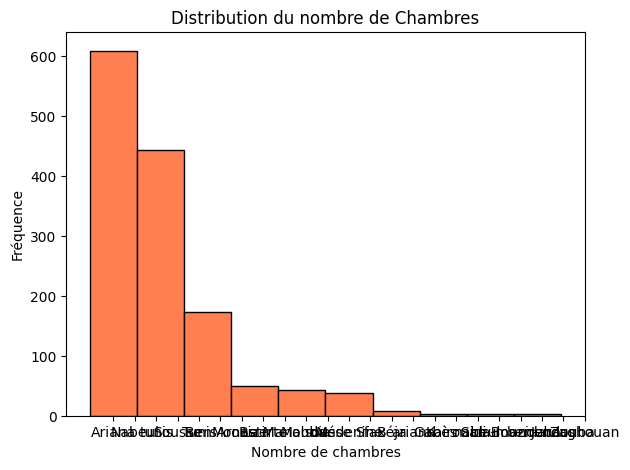

In [233]:
plt.hist(df_cleaned['city'], edgecolor='black', color='coral', align='left')
plt.title('Distribution du nombre de Chambres')
plt.xlabel('Nombre de chambres')
plt.ylabel('Fréquence')
#plt.xticks(range(0, 10))
plt.tight_layout()
plt.show()

In [234]:
def normalize_city(city):
    """
    Normalise le nom de la ville pour éliminer les redondances.
    
    Traitements:
    - Convertir en minuscules
    - Supprimer les espaces en début/fin
    - Remplacer les tirets et underscores par des espaces
    - Supprimer les articles (la, le, les, el, al)
    - Supprimer les accents
    - Normaliser les espaces multiples
    - Mapper les variations connues vers un nom standard
    """
    if pd.isna(city) or not isinstance(city, str):
        return None
    
    import unicodedata
    
    # 1. Minuscules et strip
    city = city.lower().strip()
    
    # 2. Remplacer tirets, underscores par espaces
    city = city.replace('-', ' ').replace('_', ' ')
    
    # 3. Supprimer les accents
    city = unicodedata.normalize('NFD', city)
    city = ''.join(c for c in city if unicodedata.category(c) != 'Mn')
    
    # 4. Normaliser les espaces multiples
    city = ' '.join(city.split())
    
    # 5. Supprimer les articles en début
    articles = ['la ', 'le ', 'les ', 'el ', 'al ']
    for article in articles:
        if city.startswith(article):
            city = city[len(article):]
    
    # 6. Mapping des variations connues vers nom standard
    city_mapping = {
        # Tunis et variations
        'tunis': 'tunis',
        'tunisie': 'tunis',
        
        # La Manouba
        'manouba': 'manouba',
        'la manouba': 'manouba',
        
        # Ben Arous
        'ben arous': 'ben arous',
        'benarous': 'ben arous',
        
        # Ariana
        'ariana': 'ariana',
        'ariane': 'ariana',
        'lariana': 'ariana',
        
        # Sousse
        'sousse': 'sousse',
        'soussa': 'sousse',
        
        # Sfax
        'sfax': 'sfax',
        'safax': 'sfax',
        
        # Nabeul
        'nabeul': 'nabeul',
        'nabul': 'nabeul',
        
        # Monastir
        'monastir': 'monastir',
        'mnastir': 'monastir',
        
        # Bizerte
        'bizerte': 'bizerte',
        'bizert': 'bizerte',
        'banzart': 'bizerte',
        
        # Gabes
        'gabes': 'gabes',
        'gabès': 'gabes',
        'qabes': 'gabes',
        
        # Kairouan
        'kairouan': 'kairouan',
        'kairawan': 'kairouan',
        'qayrawan': 'kairouan',
        
        # Medenine
        'medenine': 'medenine',
        'mednine': 'medenine',
        
        # Tozeur
        'tozeur': 'tozeur',
        'touzeur': 'tozeur',
        
        # Gafsa
        'gafsa': 'gafsa',
        'qafsa': 'gafsa',
        
        # Beja
        'beja': 'beja',
        'baja': 'beja',
        
        # Jendouba
        'jendouba': 'jendouba',
        'jandouba': 'jendouba',
        
        # Kef
        'kef': 'kef',
        'le kef': 'kef',
        
        # Siliana
        'siliana': 'siliana',
        'silyana': 'siliana',
        
        # Kasserine
        'kasserine': 'kasserine',
        'qasrine': 'kasserine',
        
        # Sidi bouzid
        'sidi bouzid': 'sidi bouzid',
        'sidibouzid': 'sidi bouzid',
        
        # Mahdia
        'mahdia': 'mahdia',
        'mahdiya': 'mahdia',
        
        # Kebili
        'kebili': 'kebili',
        'kebilli': 'kebili',
        
        # Tataouine
        'tataouine': 'tataouine',
        'tatouine': 'tataouine',
        
        # Zaghouan
        'zaghouan': 'zaghouan',
        'zaghwan': 'zaghouan',
        
        # Hammam sousse, etc.
        'hammam sousse': 'sousse',
        'hammamet': 'nabeul',
        'hamam sousse': 'sousse',
    }
    
    # Chercher dans le mapping
    if city in city_mapping:
        return city_mapping[city]
    
    # Si pas trouvé, retourner la version nettoyée
    return city


# Appliquer la normalisation
df_cleaned['city_normalized'] = df_cleaned['city'].apply(normalize_city)

# Vérifier les résultats
print("Avant normalisation:")
print(f"Nombre de villes uniques: {df_cleaned['city'].nunique()}")
print(df_cleaned['city'].value_counts().head(20))

print("\nAprès normalisation:")
print(f"Nombre de villes uniques: {df_cleaned['city_normalized'].nunique()}")
print(df_cleaned['city_normalized'].value_counts().head(20))

# Voir les changements
df_city_changes = df_cleaned[df_cleaned['city'] != df_cleaned['city_normalized']][['city', 'city_normalized']].drop_duplicates()
print(f"\nExemples de transformations ({len(df_city_changes)} changements):")
df_city_changes.head(20)

Avant normalisation:
Nombre de villes uniques: 23
city
Tunis          282
Nabeul         269
Ariana         202
Sousse         161
tunis          138
Ben Arous      132
Mahdia          42
Monastir        41
Bizerte         35
Sfax            24
La Manouba      16
Médenine        13
ariana           8
nabeul           3
sousse           2
Sidi Bouzid      2
Béja             1
Kairouan         1
Gabès            1
la-manouba       1
Name: count, dtype: int64

Après normalisation:
Nombre de villes uniques: 17
city_normalized
tunis          420
nabeul         272
ariana         210
sousse         163
ben arous      133
mahdia          42
monastir        41
bizerte         35
sfax            24
manouba         17
medenine        13
sidi bouzid      2
beja             1
gabes            1
kairouan         1
jendouba         1
zaghouan         1
Name: count, dtype: int64

Exemples de transformations (19 changements):


,city,city_normalized
1,Ariana,ariana
16,Nabeul,nabeul
20,Sousse,sousse
28,Tunis,tunis
40,Ben Arous,ben arous
102,Monastir,monastir
157,Bizerte,bizerte
377,La Manouba,manouba
560,Mahdia,mahdia
762,Médenine,medenine


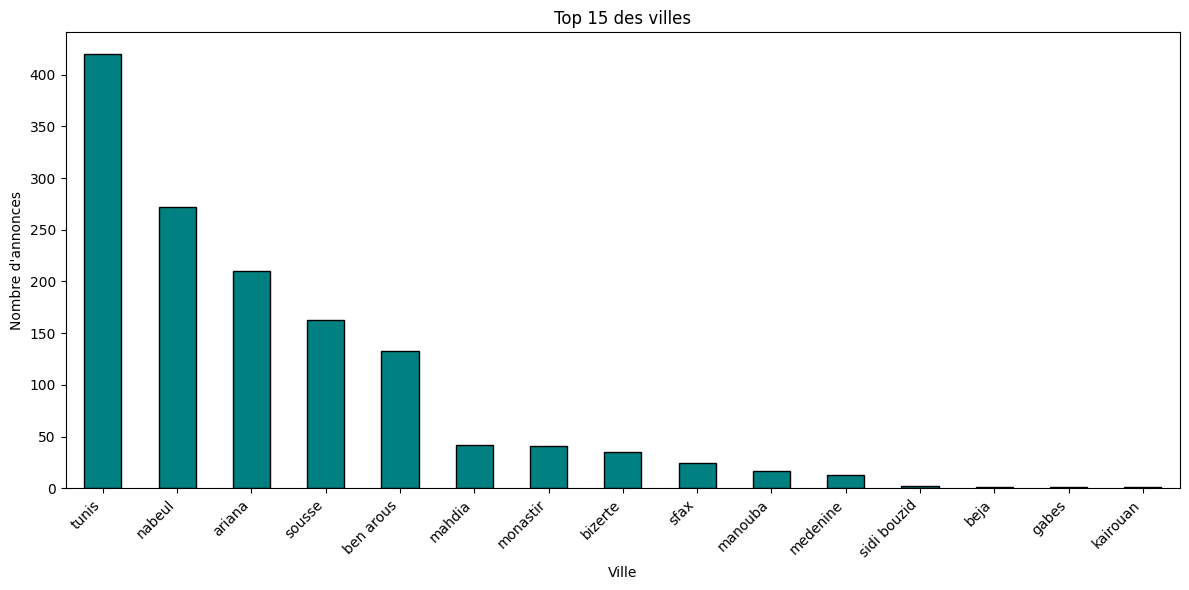


Shape final: (1377, 5)
Villes uniques: 17


In [235]:
# Remplacer city par la version normalisée
df_cleaned['city'] = df_cleaned['city_normalized']
df_cleaned.drop(columns=['city_normalized'], inplace=True)

# Supprimer les lignes avec city NaN si nécessaire
df_cleaned = df_cleaned.dropna(subset=['city'])

# Visualiser la distribution des villes
plt.figure(figsize=(12, 6))
df_cleaned['city'].value_counts().head(15).plot(kind='bar', edgecolor='black', color='teal')
plt.title('Top 15 des villes')
plt.xlabel('Ville')
plt.ylabel('Nombre d\'annonces')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"\nShape final: {df_cleaned.shape}")
print(f"Villes uniques: {df_cleaned['city'].nunique()}")

In [236]:
# Compter les occurrences de chaque ville
city_counts = df_cleaned['city'].value_counts()

# Garder uniquement les villes avec >= 10 échantillons
cities_to_keep = city_counts[city_counts >= 10].index

# Filtrer le DataFrame
df_cleaned = df_cleaned[df_cleaned['city'].isin(cities_to_keep)]

print(f"Villes supprimées (< 10 samples): {len(city_counts) - len(cities_to_keep)}")
print(f"Villes restantes: {len(cities_to_keep)}")
print(f"Shape final: {df_cleaned.shape}")

# Afficher les villes supprimées
cities_removed = city_counts[city_counts < 10]
print(f"\nVilles supprimées:")
print(cities_removed)

Villes supprimées (< 10 samples): 6
Villes restantes: 11
Shape final: (1370, 5)

Villes supprimées:
city
sidi bouzid    2
beja           1
gabes          1
kairouan       1
jendouba       1
zaghouan       1
Name: count, dtype: int64


In [237]:
df_cleaned.to_csv('tayara_cleanedV2.csv', index=False)

In [238]:
df_cleaned.dtypes

price         Float64
superficie    float64
chambres        Int64
bains         float64
city           object
dtype: object

In [240]:
# Convertir city en categorical
df_cleaned['city'] = df_cleaned['city'].astype('category')

# Convertir bains en int
df_cleaned['bains'] = df_cleaned['bains'].astype('Int64')

# Vérifier les types
print(df_cleaned.dtypes)
print(f"\nCatégories de villes: {df_cleaned['city'].cat.categories.tolist()}")

price          Float64
superficie     float64
chambres         Int64
bains            Int64
city          category
dtype: object

Catégories de villes: ['ariana', 'ben arous', 'bizerte', 'mahdia', 'manouba', 'medenine', 'monastir', 'nabeul', 'sfax', 'sousse', 'tunis']


In [249]:
df_cleaned.to_csv('tayara_cleanedV3.csv', index=True)

# Modeling

## Encode cities 

In [241]:
# One-Hot Encoding pour la colonne 'city'
# drop_first=True supprime la première ville pour éviter la colinéarité parfaite
df_encoded = pd.get_dummies(df_cleaned, columns=['city'], prefix='city', drop_first=True)

# Convertir les colonnes booléennes en entiers (0 et 1) pour la compatibilité
bool_cols = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

print(f"Shape avant encoding: {df_cleaned.shape}")
print(f"Shape après encoding: {df_encoded.shape}")

Shape avant encoding: (1370, 5)
Shape après encoding: (1370, 14)


In [245]:
# Afficher les nouvelles colonnes créées
city_cols = [col for col in df_encoded.columns if col.startswith('city_')]
city_cols # Afficher les 10 premières colonnes de ville

['city_ben arous',
 'city_bizerte',
 'city_mahdia',
 'city_manouba',
 'city_medenine',
 'city_monastir',
 'city_nabeul',
 'city_sfax',
 'city_sousse',
 'city_tunis']

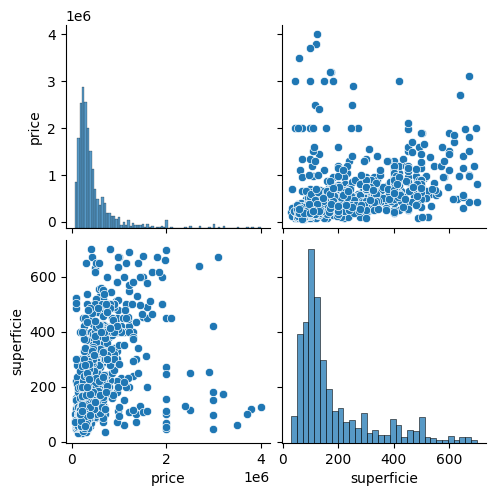

In [246]:
# Pour un aperçu global des relations
df_sup_price = df_encoded[['price', 'superficie']]
sns.pairplot(df_sup_price.dropna(), diag_kind='hist')
plt.show()

## Split and standardize data

In [247]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Separate Features (X) and Target (y)
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']

# 2. Split into Train and Test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create copies to avoid SettingWithCopyWarning
X_train = X_train.copy()
X_test = X_test.copy()

# 3. Standardize numerical features
# We scale 'superficie', 'chambres', and 'bains'. 
# We typically do NOT scale the One-Hot Encoded columns (city_...) as they are already 0/1.
cols_to_scale = ['superficie', 'chambres', 'bains']

scaler = StandardScaler()

# Fit the scaler on the Training data ONLY
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

# Transform the Test data using the scaler fitted on Train data
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

# 4. Verify the scaling
print("Training Set - Means (should be ~0):")
print(X_train[cols_to_scale].mean())
print("\nTraining Set - Std Devs (should be ~1):")
print(X_train[cols_to_scale].std())

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Training Set - Means (should be ~0):
superficie    6.483054e-18
chambres     -6.483054e-18
bains        -5.672672e-17
dtype: float64

Training Set - Std Devs (should be ~1):
superficie    1.000457
chambres      1.000457
bains         1.000457
dtype: float64

Shape of X_train: (1096, 13)
Shape of X_test: (274, 13)


## Training Models

Model                | MAE (DT)        | RMSE (DT)       | R2 Score  
----------------------------------------------------------------------
Linear Regression    | 225,727           | 498,657           | 0.1941
Random Forest        | 256,982           | 515,162           | 0.1399
XGBoost              | 264,026           | 532,220           | 0.0820
KNN                  | 241,889           | 497,633           | 0.1974


C:\Users\DELL\AppData\Local\Temp\ipykernel_25128\1619316924.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2', y='Model', data=results_df.sort_values('R2', ascending=False), palette='viridis')


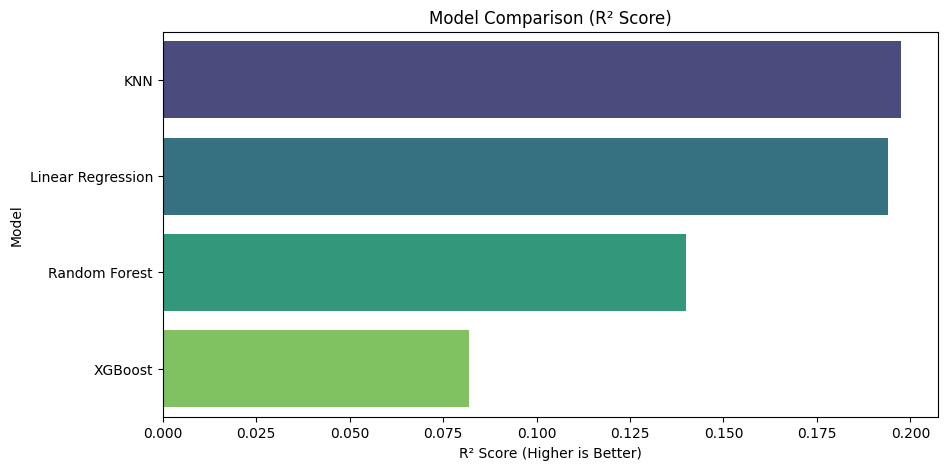

In [250]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

# 1. Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

# 2. Train and Evaluate
results = []

print(f"{'Model':<20} | {'MAE (DT)':<15} | {'RMSE (DT)':<15} | {'R2 Score':<10}")
print("-" * 70)

for name, model in models.items():
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Evaluate
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append({'Model': name, 'MAE': mae, 'RMSE': rmse, 'R2': r2})
    
    print(f"{name:<20} | {mae:,.0f}           | {rmse:,.0f}           | {r2:.4f}")

# 3. Visualize Comparison
results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 5))
sns.barplot(x='R2', y='Model', data=results_df.sort_values('R2', ascending=False), palette='viridis')
plt.title('Model Comparison (R² Score)')
plt.xlabel('R² Score (Higher is Better)')
plt.ylabel('Model')
plt.show()

## Solution: Log-Transformation & Outlier Removal

Original shape: (1370, 14)
Filtered shape: (1232, 14)
Model                | R2 Score   | Real MAE (DT)   | Real RMSE (DT) 
-------------------------------------------------------
Linear Regression    | 0.6809     | 116,892     | 180,681
Random Forest        | 0.6831     | 112,237     | 172,187
XGBoost              | 0.6677     | 110,886     | 171,873
KNN                  | 0.6886     | 107,205     | 165,241


C:\Users\DELL\AppData\Local\Temp\ipykernel_25128\1572104483.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2', y='Model', data=results_log_df.sort_values('R2', ascending=False), palette='viridis')


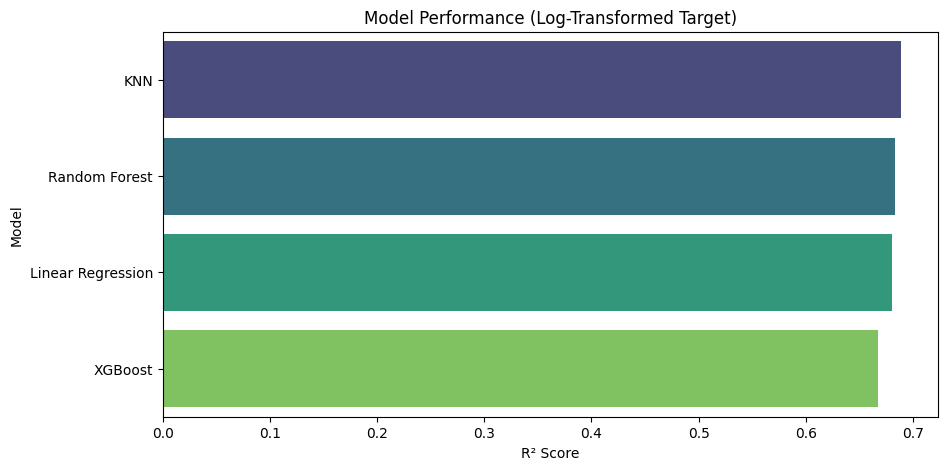

In [254]:
# 1. Outlier Removal based on Price per m²
# We remove the top/bottom 5% of properties based on price/m² to remove inconsistencies
df_clean_v2 = df_encoded.copy()
df_clean_v2['price_m2'] = df_clean_v2['price'] / df_clean_v2['superficie']

lower_bound = df_clean_v2['price_m2'].quantile(0.05)
upper_bound = df_clean_v2['price_m2'].quantile(0.95)

df_filtered = df_clean_v2[(df_clean_v2['price_m2'] >= lower_bound) & (df_clean_v2['price_m2'] <= upper_bound)]
df_filtered = df_filtered.drop(columns=['price_m2'])

print(f"Original shape: {df_encoded.shape}")
print(f"Filtered shape: {df_filtered.shape}")

# 2. Log-Transformation of Target
# Predicting log(price) is standard practice for real estate
X_new = df_filtered.drop(columns=['price'])
y_new = np.log1p(df_filtered['price'])  # Apply Log transformation

# 3. Split and Scale
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

scaler_new = StandardScaler()
cols_to_scale = ['superficie', 'chambres', 'bains']

X_train_new[cols_to_scale] = scaler_new.fit_transform(X_train_new[cols_to_scale])
X_test_new[cols_to_scale] = scaler_new.transform(X_test_new[cols_to_scale])

# 4. Retrain Models on Log-Transformed Data
results_log = []

print(f"{'Model':<20} | {'R2 Score':<10} | {'Real MAE (DT)':<15} | {'Real RMSE (DT)':<15}")
print("-" * 55)

for name, model in models.items():
    # Train on log data
    model.fit(X_train_new, y_train_new)
    
    # Predict (results are in log scale)
    y_pred_log = model.predict(X_test_new)
    
    # Calculate R2 on log scale (measures how well the model fits the curve)
    r2_log = r2_score(y_test_new, y_pred_log)
    
    # Convert predictions back to Real Prices (DT) for interpretation
    y_pred_real = np.expm1(y_pred_log)
    y_test_real = np.expm1(y_test_new)
    
    mae_real = mean_absolute_error(y_test_real, y_pred_real)
    rmse_real = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
    
    results_log.append({'Model': name, 'R2': r2_log, 'MAE': mae_real, 'RMSE': rmse_real})
    
    print(f"{name:<20} | {r2_log:.4f}     | {mae_real:,.0f}     | {rmse_real:,.0f}")

# Visualization
results_log_df = pd.DataFrame(results_log)
plt.figure(figsize=(10, 5))
sns.barplot(x='R2', y='Model', data=results_log_df.sort_values('R2', ascending=False), palette='viridis')
plt.title('Model Performance (Log-Transformed Target)')
plt.xlabel('R² Score')
plt.show()

In [256]:
from sklearn.model_selection import GridSearchCV

# 1. Define the parameter grids
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# 2. Grid Search for KNN
print("Tuning KNN...")
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5, scoring='r2', n_jobs=-1)
grid_knn.fit(X_train_new, y_train_new)

best_knn = grid_knn.best_estimator_
print(f"Best KNN Parameters: {grid_knn.best_params_}")
print(f"Best KNN CV Score: {grid_knn.best_score_:.4f}")

# 3. Grid Search for Random Forest
print("\nTuning Random Forest...")
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train_new, y_train_new)

best_rf = grid_rf.best_estimator_
print(f"Best RF Parameters: {grid_rf.best_params_}")
print(f"Best RF CV Score: {grid_rf.best_score_:.4f}")

# 4. Final Evaluation on Test Set
print("\nFinal Test Set Evaluation:")
print("-" * 30)

# Evaluate Best KNN
y_pred_log_knn = best_knn.predict(X_test_new)
r2_knn = r2_score(y_test_new, y_pred_log_knn)
mae_knn = mean_absolute_error(np.expm1(y_test_new), np.expm1(y_pred_log_knn))
rmse_knn = np.sqrt(mean_squared_error(np.expm1(y_test_new), np.expm1(y_pred_log_knn)))
print(f"Optimized KNN | R2: {r2_knn:.4f} | MAE: {mae_knn:,.0f} DT | RMSE: {rmse_knn:,.0f} DT")

# Evaluate Best RF
y_pred_log_rf = best_rf.predict(X_test_new)
r2_rf = r2_score(y_test_new, y_pred_log_rf)
mae_rf = mean_absolute_error(np.expm1(y_test_new), np.expm1(y_pred_log_rf))
rmse_rf = np.sqrt(mean_squared_error(np.expm1(y_test_new), np.expm1(y_pred_log_rf)))
print(f"Optimized RF  | R2: {r2_rf:.4f} | MAE: {mae_rf:,.0f} DT | RMSE: {rmse_rf:,.0f} DT")

Tuning KNN...
Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Best KNN CV Score: 0.6487

Tuning Random Forest...
Best RF Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Best RF CV Score: 0.6836

Final Test Set Evaluation:
------------------------------
Optimized KNN | R2: 0.6872 | MAE: 107,906 DT | RMSE: 169,145 DT
Optimized RF  | R2: 0.7169 | MAE: 108,043 DT | RMSE: 169,361 DT


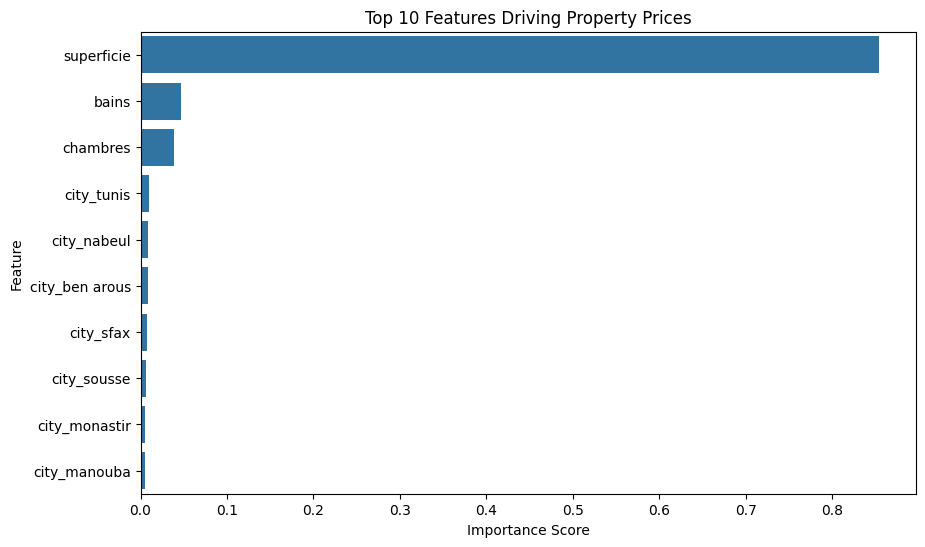

✅ Model, Scaler, and Column namesimport joblib saved successfully!


In [259]:
import joblib

# 1. Feature Importance Visualization
# See what matters most: Location? Surface?
importances = best_rf.feature_importances_
feature_names = X_train_new.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, legend=False)
plt.title('Top 10 Features Driving Property Prices')
plt.xlabel('Importance Score')
plt.show()

# 2. Save the Model & Artifacts
# We need to save 3 things to use this in an app:
# - The Model (best_rf)
# - The Scaler (scaler_new) to scale user inputs
# - The Column Names (X_train_new.columns) to ensure One-Hot Encoding matches

joblib.dump(best_rf, 'model_rf_optimized.pkl')
joblib.dump(scaler_new, 'scaler.pkl')
joblib.dump(X_train_new.columns.tolist(), 'model_columns.pkl')

print("✅ Model, Scaler, and Column namesimport joblib saved successfully!")